# EDA voor hardloop dataset door Jort Gommers

Hierbij laat ik een Exploratory Data Analysis (EDA) van de dataset over hardloopblessures van het SMART Movement-onderzoek zien. 

De gegevens lijken te zijn verzameld via een dagelijks in te vullen formulier door hardlopers. Deze dataset is beschikbaar gesteld op GitHub, waardoor deze te allen tijde toegankelijk is voor geïnteresseerden.

De dataset bestaat uit twee bestanden. Het eerste bestand, 'hardloop.tsv', bevat informatie over de hardloopsessies, zoals de datum, de duur, en de intensiteit. Dit bestand omvat in totaal 9 kolommen, waarvan één kolom met 32.498 datapunten betreffende de hardloopdata.

Het tweede bestand behandelt blessures die zich hebben voorgedaan tijdens de periode waarin mensen aan het hardlopen waren. Dit bestand bevat 11 kolommen met informatie over 61 blessures. Het is vermeldenswaardig dat een aanzienlijk deel van deze dataset lege waarden bevat.


## Variablen 

Dit zijn de variablen voor de  files:

### hardloop.tsv
dates = datum hardgelopen  
moment = moment van de dag hardgelopen ochtend of avond  
TQR = mate van inspanning na hardlopen  
RPE = een mate van hoe belastend het is tijdens het lopen  
duration = hoelang die dag is hardgelopen  
sleep = hoeveel er is geslapen die dag door de hardloper  
person_id = de persoon waar het omgaat er zijn 24 personen.  

### blessures.tsv
PERSON_ID = een persoonlijke ID per persoon.  
NAME = naam van de plek van de blessure  
DIAGNOSE = De diagnose van de blessure door een professional  
DATE_START = moment dat de blessure startte  
DATE_END =	moment dat de blessure stopte  
TIME_LOSS =	hoeveel dagen ze last hadden van de blessure  
LOCATION_INJURY = locatie van de blessure  
SIDE = kant van de locatie van de blessure indien nodig.  
TYPE =	altijd leeg maar waarschijnlijk hoord hier chronic of acute blessure te staan  
OCCURENCE =	hoe vaak het voorkwam  
REMARKS =	nog enige informatie erbij  
ID = ID gekoppeld aan de persoon_id in de eerste file  


### informatie erbij

Veel van de gegevens met betrekking tot blessures bevatten lege waardes, vooral vanaf 'location_injury' tot 'remarks', hoogstwaarschijnlijk omdat de hardlopers niet op de hoogte waren van het antwoord op deze vragen. Daarnaast is er meerdere keren gereageerd met vraagtekens bij de diagnose of de naam van de blessure, wat de bestandscodering niet optimaliseert maar nog steeds van essentieel belang is om te registreren. In het geval van de hardloop TSV ontbreken veel waardes, aangezien de hardlopers niet twee keer per dag hebben hardgelopen, waardoor het niet zinvol is om deze lege velden in te vullen. Het veld TQR_of_RPE is niet van belang volgens de begeleider die is overigens ook helemaal leeg.

In [5]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Afdrukken van de kop van de eerste dataset
print("Head van Dataset 1:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset
print("\nHead van Dataset 2:")
print(df2.head())



Head van Dataset 1:
   PERSON_ID    NAME          DIAGNOSE DATE_START   DATE_END  TIME_LOSS  \
0          1  DRUNA1             Kuit   20-MAR-12  03-APR-12       14.0   
1          1  DRUNA1  voet(verstappen)  10-DEC-12  17-DEC-12        7.0   
2          1  DRUNA1              lies  24-MAR-13  30-SEP-13      190.0   
3         19  DRUNA2      Achillespees  03-OCT-11  23-DEC-11       81.0   
4         19  DRUNA2              Heup  22-MAR-12  12-JAN-13      296.0   

   LOCATION_INJURY SIDE TYPE OCCURENCE REMARKS  ID  
0             kuit  NaN  NaN       NaN     NaN   1  
1  voet (verstapt)  NaN  NaN       NaN     NaN   2  
2             lies  NaN  NaN       NaN     NaN   3  
3                ?  NaN  NaN       NaN     NaN   4  
4             heup  NaN  NaN       NaN     NaN   5  

Head van Dataset 2:
       DATES MOMENT   TQR   RPE  DURATION  SLEEP  PERSON_ID    ID  TQR_OF_RPE
0  30-APR-12      A   NaN   NaN       0.0    0.0        1.0  1973         NaN
1  30-APR-12      O  15.0  13.0   

### Data weergaven 
Hier zie je een overzicht van de gegevens in de bestanden, met de eerder genoemde variabelen. Mogelijke lege waarden in bepaalde kolommen, zoals aangegeven in de dataset, kunnen nadere analyse vereisen om de betekenis en impact te begrijpen. Het is belangrijk om op te merken dat lege waarden vaak met de begeleider moeten worden besproken om de juiste interpretatie vast te stellen. Voor nu laten we de behandeling van deze lege waarden buiten beschouwing, maar het is aan te handig om hierover afstemming te hebben met de begeleider om eventuele misverstanden te voorkomen.

In [6]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Verwijder NaN-waarden uit de datasets
df1 = df1.dropna()
df2 = df2.dropna()

# Afdrukken van de kop van de eerste dataset zonder NaN-waarden
print("Head van Dataset 1 zonder NaN:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset zonder NaN-waarden
print("\nHead van Dataset 2 zonder NaN:")
print(df2.head())


Head van Dataset 1 zonder NaN:
    PERSON_ID    NAME                DIAGNOSE DATE_START   DATE_END  \
11          2  DRUNE1  Onderbeen/Achillespees  09-NOV-11  22-DEC-11   
14          3  DRUNE2  Onderbeen/Achillespees  28-JAN-13  24-FEB-13   
20          4  DRUNF1               Heup/Lies  30-APR-13  26-AUG-13   
22          5  DRUNH1                    Knie  05-JAN-13  05-MAR-13   
28          6  DRUNJ1                  Scheen  21-MAR-13  21-JUL-13   

    TIME_LOSS         LOCATION_INJURY   SIDE                   TYPE  \
11       43.0  Onderbeen/achillespees  links           Peesblessure   
14       27.0  Onderbeen/achillespees  links    anders| Niet bekend   
20      118.0               Heup/Lies  Links     anders| Aspecifiek   
22       59.0                    Knie  Links  anders| overbelasting   
28      122.0                  scheen  links               fractuur   

        OCCURENCE                                            REMARKS  ID  
11  overbelasting  Hij heeft een halve-m

### Data weergaven zonder NAN's
Hier boven zie je de data duidelijker zonder de NAN's. Het is echter belangrijk op te merken dat het verwijderen van NAN's geen definitieve oplossing is voor de grafieken, omdat dit kan leiden tot het verlies van belangrijke gegevens. Zo is bijvoorbeeld dataset 2 leeg omdat er een kolom is met uitsluitend NAN's. Als we deze NAN's verwijderen, kan het lijken alsof er geen activiteit heeft plaatsgevonden, terwijl de data eigenlijk ontbreekt. Daarom is het cruciaal om een weloverwogen beslissing te nemen over het omgaan met NAN's, ofwel door ze te behouden of door ze te vervangen door bijvoorbeeld het getal 0.

In [7]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Afdrukken van de kop van de eerste dataset met NaN-waarden vervangen door 0
print("Head van Dataset 1 met NaN vervangen door 0:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset met NaN-waarden vervangen door 0
print("\nHead van Dataset 2 met NaN vervangen door 0:")
print(df2.head())


Head van Dataset 1 met NaN vervangen door 0:
   PERSON_ID    NAME          DIAGNOSE DATE_START   DATE_END  TIME_LOSS  \
0          1  DRUNA1             Kuit   20-MAR-12  03-APR-12       14.0   
1          1  DRUNA1  voet(verstappen)  10-DEC-12  17-DEC-12        7.0   
2          1  DRUNA1              lies  24-MAR-13  30-SEP-13      190.0   
3         19  DRUNA2      Achillespees  03-OCT-11  23-DEC-11       81.0   
4         19  DRUNA2              Heup  22-MAR-12  12-JAN-13      296.0   

   LOCATION_INJURY SIDE TYPE OCCURENCE REMARKS  ID  
0             kuit    0    0         0       0   1  
1  voet (verstapt)    0    0         0       0   2  
2             lies    0    0         0       0   3  
3                ?    0    0         0       0   4  
4             heup    0    0         0       0   5  

Head van Dataset 2 met NaN vervangen door 0:
       DATES MOMENT   TQR   RPE  DURATION  SLEEP  PERSON_ID    ID  TQR_OF_RPE
0  30-APR-12      A   0.0   0.0       0.0    0.0        1.0  1

### Data weergaven met 0 inplaats van niks
Hier heb ik de NAN's vervangen door 0, zodat de code nog steeds bruikbaar is voor het genereren van grafieken. Op deze manier worden de ontbrekende waarden gecompenseerd met het getal 0, waardoor de dataset volledig numeriek blijft en geschikt is voor grafische representatie


### hoogste waarde
Hieronder onderzoek ik of er enkele uitschieters zijn in de waarden om te beoordelen of alles in orde is en om de grenzen vast te stellen.

In [9]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Vind de hoogste waarde voor specifieke kolommen in Dataset 2
max_tqr = df2["TQR"].max()
max_rpe = df2["RPE"].max()
max_duration = df2["DURATION"].max()
max_sleep = df2["SLEEP"].max()

# Afdrukken van de hoogste waarde voor elke specifieke kolom in Dataset 2
print("Hoogste waarde voor 'TQR' in Dataset 2:", max_tqr)
print("Hoogste waarde voor 'RPE' in Dataset 2:", max_rpe)
print("Hoogste waarde voor 'DURATION' in Dataset 2:", max_duration)
print("Hoogste waarde voor 'SLEEP' in Dataset 2:", max_sleep)


Hoogste waarde voor 'TQR' in Dataset 2: 20.0
Hoogste waarde voor 'RPE' in Dataset 2: 20.0
Hoogste waarde voor 'DURATION' in Dataset 2: 1160.0
Hoogste waarde voor 'SLEEP' in Dataset 2: 120.0


### hoogste waardes 
Hier zie ik dat TQR en RPE waarden tussen 0 en 20 hebben, wat waarschijnlijk correct is. Echter, bij Duration lijkt er een fout te zijn, aangezien het onwaarschijnlijk is dat iemand 1160 minuten heeft hardgelopen. Ook lijkt Sleep een fout te bevatten, aangezien niemand 120 uur in één dag zou slapen.

Ik plan om met de begeleider te overleggen over de gewenste limieten voor Sleep en Duration om mogelijke fouten te voorkomen. De hoogste waarden in Dataset 2 zijn als volgt:

Hoogste waarde voor 'TQR': 20.0
Hoogste waarde voor 'RPE': 20.0
Hoogste waarde voor 'DURATION': 1160.0
Hoogste waarde voor 'SLEEP': 120.0

In [10]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Print informatie over de datasets
print("Informatie over Dataset 1:")
print(df1.info())

print("\nInformatie over Dataset 2:")
print(df2.info())


Informatie over Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON_ID        60 non-null     int64  
 1   NAME             60 non-null     object 
 2   DIAGNOSE         60 non-null     object 
 3   DATE_START       60 non-null     object 
 4   DATE_END         60 non-null     object 
 5   TIME_LOSS        60 non-null     float64
 6   LOCATION_INJURY  60 non-null     object 
 7   SIDE             60 non-null     object 
 8   TYPE             60 non-null     object 
 9   OCCURENCE        60 non-null     object 
 10  REMARKS          60 non-null     object 
 11  ID               60 non-null     int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.8+ KB
None

Informatie over Dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32497 entries, 0 to 32496
Data columns (total 9 columns):
 #   Column      Non-Nu

### informatie datasets
informatie dataset 1:  
Onderzoek naar Dataset 1 toont aan dat de meeste waarden floats zijn, maar wellicht beter als integers kunnen worden beschouwd, met name bij dataset 2 (hardlopen.tsv). De kolommen Sleep, TQR, RPE en Duration bevatten namelijk numerieke gegevens en zouden daarom beter aangepast kunnen worden naar integer types.

Wat betreft de overige kolommen, deze bevatten voornamelijk objecten, wat geen problemen zou moeten veroorzaken in de toekomst.

informatie dataset2:    
Dit overzicht benadrukt de behoefte aan het heroverwegen van de datatypes voor specifieke kolommen in Dataset 2 om een meer passende representatie van de gegevens te garanderen.

## Kijken gemiddeldes

Hieronder staat de code om te kijken naar de gemiddels van de dataset

In [12]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')



# Headers van file 2
headers_file2 = ["TQR", "RPE", "DURATION", "SLEEP"]

# Subset van file 2 met alleen de gewenste kolommen
df2_subset = df2[headers_file2]

# Vind het gemiddelde van elke kolom voor Dataset 2
average_values_df2 = df2_subset.mean()

# Afdrukken van het gemiddelde van elke kolom voor Dataset 2
print("\nGemiddelde van elke kolom voor Dataset 2:")
print(average_values_df2)



Gemiddelde van elke kolom voor Dataset 2:
TQR         14.337870
RPE         12.757787
DURATION    35.677369
SLEEP        5.105686
dtype: float64


### Reactie gemiddelde's

Hierbij is ervoor gekozen de NAN-waarden niet te vervangen door 0, omdat dit potentieel problematisch kan zijn. De gemiddelden zien er echter normaal uit, zonder extreem grote verschillen.

# Grafieken

Hieronder staan grafieken met een beschrijving van de datasets

## Scatterplot 1

/tmp/ipykernel_1769097/1194201282.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])


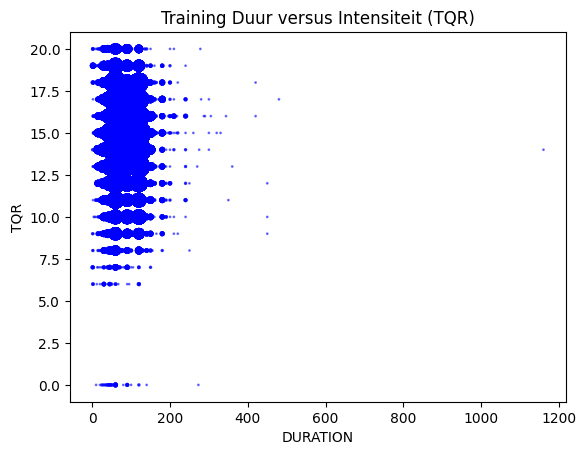

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'hardloop.tsv'

# Read the TSV file, specifying the date format for the 'DATES' column and handling quoting
df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])

# Clean up column names by removing leading and trailing whitespaces and double quotes
df.columns = df.columns.str.strip().str.strip('"')

# Replace empty strings with NaN in the entire DataFrame
df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values in the 'DATES' column
df = df.dropna(subset=['DATES'])

# Create a new column 'duration_tqr_pair' by combining 'DURATION' and 'TQR' columns
df['duration_tqr_pair'] = df['DURATION'].astype(str) + '_' + df['TQR'].astype(str)

# Group by 'duration_tqr_pair' and create a new column 'value_counts'
df['value_counts'] = df.groupby('duration_tqr_pair')['duration_tqr_pair'].transform('count')

# Fill NAs with 0s
df = df.fillna(0)

# Plot using matplotlib.scatter with transparency and blue color
plt.scatter(df[df['DURATION'] > 0]['DURATION'], df[df['DURATION'] > 0]['TQR'], c='blue', alpha=0.5, s=df[df['DURATION'] > 0]['value_counts'])

# Set plot title and labels
plt.title('Training Duur versus Intensiteit (TQR)')
plt.xlabel('DURATION')
plt.ylabel('TQR')

# Show the plot
plt.show()


### Reactie scatterplot 1
Deze scatterplot biedt een visualisatie van de relatie tussen de trainingsduur (DURATION) en de intensiteit van de training (TQR) binnen de beschikbare dataset.

Bij het bekijken van de plot valt op dat er geen duidelijke relatie lijkt te zijn tussen de twee variabelen. Bovendien wordt geconstateerd dat veel waarden identiek zijn, wat mogelijk wijst op herhalende patronen. Dit fenomeen vraagt om nadere overweging en mogelijke strategieën voor toekomstige analyses om hiermee om te gaan.

Een opvallend aspect in de plot is de aanwezigheid van gevallen waarin er wel hardgelopen lijkt te zijn, maar waarbij een TQR-waarde van 0 is ingevuld. Dit zou als een fout geïnterpreteerd kunnen worden. Het is aan te raden om met de begeleider te bespreken om te bepalen welke acties ondernomen moeten worden om de integriteit van de gegevens te waarborgen.

## Boxplot 1 TQR

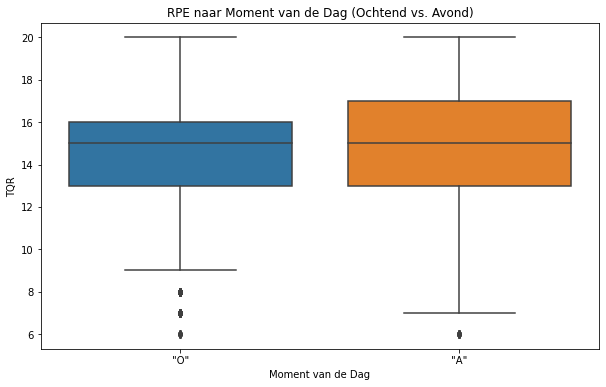

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'hardloop.tsv'

# Read the TSV file, specifying the date format for the 'DATES' column and handling quoting
df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])

# Clean up column names by removing leading and trailing whitespaces and double quotes
df.columns = df.columns.str.strip().str.strip('"')

# Replace empty strings with NaN in the entire DataFrame
df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values in the 'DATES' column
df = df.dropna(subset=['DATES'])

# Create a new column 'duration_tqr_pair' by combining 'DURATION' and 'TQR' columns
df['duration_tqr_pair'] = df['DURATION'].astype(str) + '_' + df['TQR'].astype(str)

# Group by 'duration_tqr_pair' and create a new column 'value_counts'
df['value_counts'] = df.groupby('duration_tqr_pair')['duration_tqr_pair'].transform('count')

# Fill NAs with 0s
df = df.fillna(0)

# Filter the DataFrame for RPE > 0
df_rpe_filtered = df[df['TQR'] > 0]

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='MOMENT', y='TQR', data=df_rpe_filtered)
plt.title('TQR naar Moment van de Dag (Ochtend vs. Avond)')
plt.xlabel('Moment van de Dag')
plt.ylabel('TQR')
plt.show()


## Reactie boxplot RPE
In de  grafiek wordt een boxplot weergegeven die de verdeling van de TQR (Inspanning na hardlopen) laat zien op verschillende momenten van de dag, in dit geval, 'Ochtend' en 'Avond'.

Hier heb ik een boxplot gemaakt op basis van de inspanning op verschillende momenten van de dag. Hieruit blijkt dat het gemiddelde TQR ('Inspanning na hardlopen') 's ochtends 1 punt lager ligt dan 's avonds, wat een significant verschil kan aanduiden. Dat s'avonds een grotere inspanning na het hardlopen heeft. 


## Boxplot 2 RPE

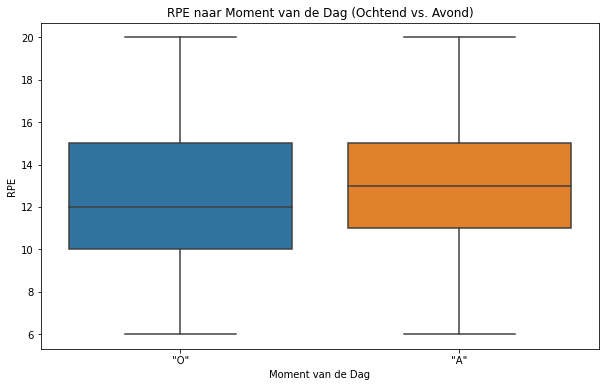

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'hardloop.tsv'

# Read the TSV file, specifying the date format for the 'DATES' column and handling quoting
df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])

# Clean up column names by removing leading and trailing whitespaces and double quotes
df.columns = df.columns.str.strip().str.strip('"')

# Replace empty strings with NaN in the entire DataFrame
df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values in the 'DATES' column
df = df.dropna(subset=['DATES'])

# Create a new column 'duration_tqr_pair' by combining 'DURATION' and 'TQR' columns
df['duration_tqr_pair'] = df['DURATION'].astype(str) + '_' + df['TQR'].astype(str)

# Group by 'duration_tqr_pair' and create a new column 'value_counts'
df['value_counts'] = df.groupby('duration_tqr_pair')['duration_tqr_pair'].transform('count')

# Fill NAs with 0s
df = df.fillna(0)

# Filter the DataFrame for RPE > 0
df_rpe_filtered = df[df['RPE'] > 0]

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='MOMENT', y='RPE', data=df_rpe_filtered)
plt.title('RPE naar Moment van de Dag (Ochtend vs. Avond)')
plt.xlabel('Moment van de Dag')
plt.ylabel('RPE')
plt.show()


### Reactie boxplot RPE

In de  grafiek wordt een boxplot weergegeven die de verdeling van de RPE (Inspanning tijdens hardlopen) laat zien op verschillende momenten van de dag, in dit geval, 'Ochtend' en 'Avond'.

Hier heb ik een boxplot gemaakt op basis van de inspanning op verschillende momenten van de dag. Hieruit blijkt dat het gemiddelde RPE ('Inspanning tijdens hardlopen') 's ochtends 1 punt lager ligt dan 's avonds, wat een significant verschil kan aanduiden. dat s'ochtends hardlopen minder zwaar is voor mensen dan s'avonds. 

## Code voor summary data

In [59]:
import pandas as pd

# Bestandsnamen
file1 = 'blessures.tsv'
file2 = 'hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Samenvatten van de datasets
summary_result_1 = df1.describe()
summary_result_2 = df2.describe()

# Afdrukken van de resultaten
print(summary_result_1)
print(summary_result_2)


       PERSON_ID   TIME_LOSS         ID
count  60.000000   59.000000  60.000000
mean   11.266667   56.152542  30.500000
std     6.617559   64.819594  17.464249
min     1.000000    7.000000   1.000000
25%     5.000000   13.000000  15.750000
50%    11.500000   34.000000  30.500000
75%    16.250000   63.000000  45.250000
max    24.000000  306.000000  60.000000
                TQR           RPE      DURATION         SLEEP    PERSON_ID  \
count  13227.000000  13228.000000  28063.000000  25784.000000  30323.00000   
mean      14.337870     12.757787     35.677369      5.105686     12.08327   
std        3.128276      3.128023     46.729298      4.392652      6.78762   
min        0.000000      0.000000      0.000000      0.000000      1.00000   
25%       13.000000     11.000000      0.000000      0.000000      6.00000   
50%       15.000000     13.000000      0.000000      8.000000     12.00000   
75%       17.000000     15.000000     60.000000      9.000000     18.00000   
max       20.000

## info describe data
Deze statistieken geven een gedetailleerd inzicht in de dataset door informatie te verstrekken over de centrale tendens, spreiding en verdeling van diverse variabelen. Afgezien van de aanwezigheid van uitschieters, lijkt er niets bijzonders opvallends te zijn.

## Lijn garfiek 1

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2402570934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2402570934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2402570934.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

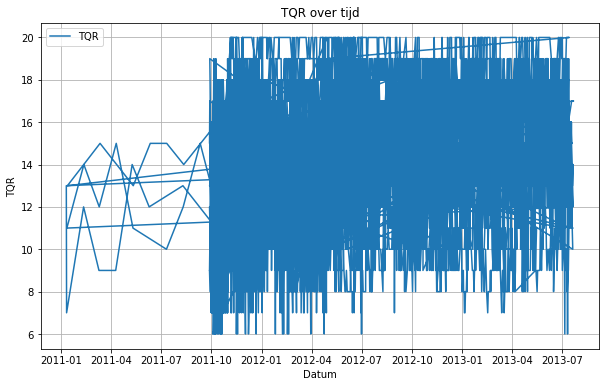

In [60]:
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']


plt.figure(figsize=(10, 6))
plt.plot(df['DATES'], df['TQR'], label='TQR')
plt.title('TQR over tijd')
plt.xlabel('Datum')
plt.ylabel('TQR')
plt.legend()
plt.grid(True)
plt.show()

### Reactie lijn grafiek 1

De plot toont de veranderingen in 'TQR' (inspanning na het hardlopen) in de loop van de tijd. Elke datum is langs de x-as geplaatst, terwijl de overeenkomstige 'TQR'-waarden langs de y-as worden weergegeven. Zoals duidelijk wordt, hebben hardlopers op bepaalde momenten op dezelfde datum gelopen, waardoor individuele trends beter afzonderlijk per persoon kunnen worden geanalyseerd in plaats van allemaal tegelijk. Bovendien is de grote hoeveelheid data dicht op elkaar geplaatst, wat het moeilijk maakt om de grafiek nauwkeurig te volgen. Op dit moment lijkt er geen duidelijk patroon te zijn dat gemakkelijk kan worden onderscheiden, en er zijn geen opvallende trends of patronen waardevol uit te halen

## Lijn grafiek 2

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3663278430.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3663278430.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3663278430.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

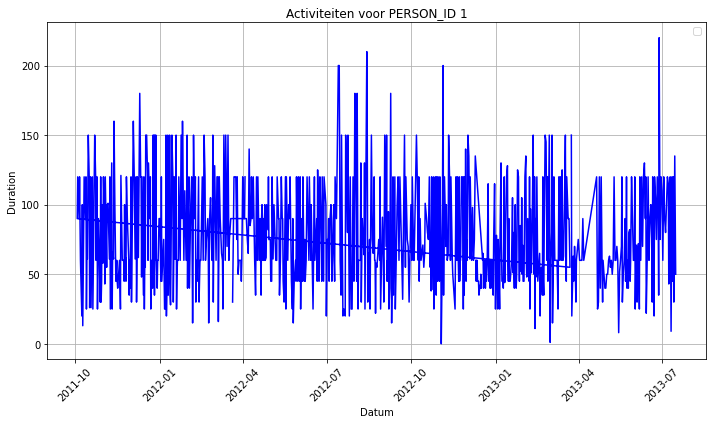

In [70]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for _, group in grouped_data:
        plt.plot(group['DATES'], group[metric], label=None, color='blue')  # Gebruik bijvoorbeeld zwart als lijnkleur

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('Duration')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'DURATION'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)

## Reactie lijn grafiek 2
De plot toont de veranderingen in 'DURATION' (Hoelang er hardgelopen is) in de loop van de tijd. Elke datum is langs de x-as geplaatst, terwijl de overeenkomstige 'DURATION'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1'.

Door te kiezen voor slechts één individu, wordt de grafiek beter leesbaar. Op dit moment lijkt er echter geen duidelijk patroon te zijn dat kan worden waargenomen. In een andere dataset staat vermeld dat bepaalde personen op specifieke momenten blessures hebben, wat hier nog niet zichtbaar is. Om deze informatie toe te passen, kan het zinvol zijn om de blessures met verschillende kleuren aan te geven in de plot. Hierdoor wordt het mogelijk om specifieke momenten van blessures te identificeren en te onderzoeken of ze invloed hebben op de duur van de activiteit.

## Lijn grafiek 3 kleur

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2707521212.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2707521212.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2707521212.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

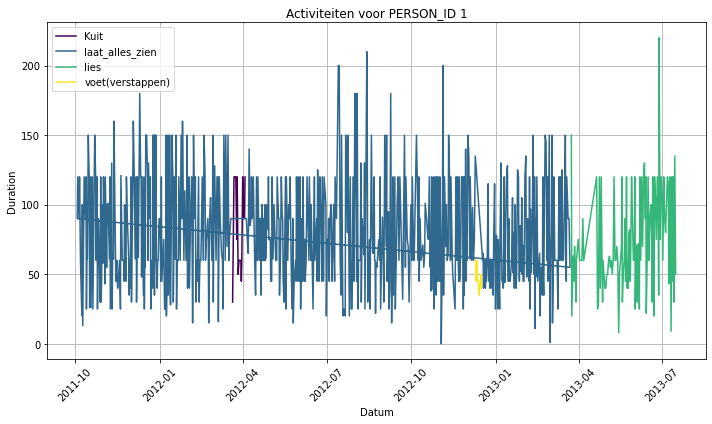

In [71]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(grouped_data))

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for i, (blessure, group) in enumerate(grouped_data):
        rgba_color = to_rgba(cmap(i))
        plt.plot(group['DATES'], group[metric], label=blessure, color=rgba_color)

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('Duration')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'DURATION'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)


### Reactie lijn grafiek 3 kleur
De plot illustreert de veranderingen in 'DURATION' (duur van het hardlopen) in de loop van de tijd. Elke datum is langs de x-as geplaatst, terwijl de overeenkomstige 'DURATION'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1', en de kleur wordt bepaald door de aanwezigheid van blessures.

Hoewel de blessures duidelijk zichtbaar zijn in de grafiek, blijft het moeilijk om een significant verschil te onderscheiden tussen periodes met en zonder blessures. Dit geldt niet alleen voor 'person_iD 1', maar lijkt ook van toepassing te zijn wanneer andere personen worden geselecteerd (via het aanpassen van person_id 1 naar person_id  2 tot 24). 

## Lijn grafiek 4 TQR

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1677319541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1677319541.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1677319541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

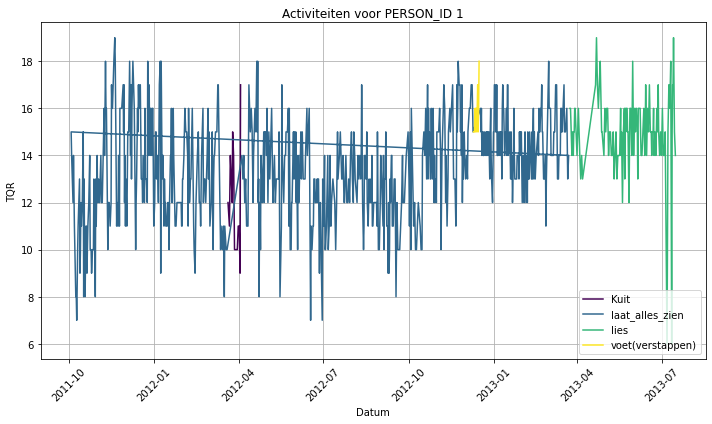

In [72]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(grouped_data))

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for i, (blessure, group) in enumerate(grouped_data):
        rgba_color = to_rgba(cmap(i))
        plt.plot(group['DATES'], group[metric], label=blessure, color=rgba_color)

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('TQR')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'TQR'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)


### Reactie lijn grafiek 4 TQR

De plot visualiseert de veranderingen in 'TQR' (inspanning na het hardlopen) in de loop van de tijd. Langs de x-as zijn de datums geplaatst, terwijl de bijbehorende 'TQR'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1'. De kleur van de lijn wordt bepaald door de aanwezigheid van blessures.

Opvallend is dat de 'TQR' aanzienlijk hoger lijkt te zijn vlak voor en na de blessureperiode bij persoon 1, met uitzondering van de kuit, waar de waarden lager zijn. Voor andere personen vertoont de grafiek soms lichte verschillen, maar deze zijn niet altijd duidelijk waarneembaar. Deze plot kan mogelijk een belangrijk verschil aanduiden, vooral bij persoon 1, en zou daarom een nuttige toevoeging kunnen zijn aan het data-dashboard. Het benadrukt mogelijke patronen in de relatie tussen 'TQR', blessures en specifieke lichaamsdelen, wat waardevolle kan zijn voor verdere analyse

## Lijn grafiek 5 RPE

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2252143156.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2252143156.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/2252143156.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

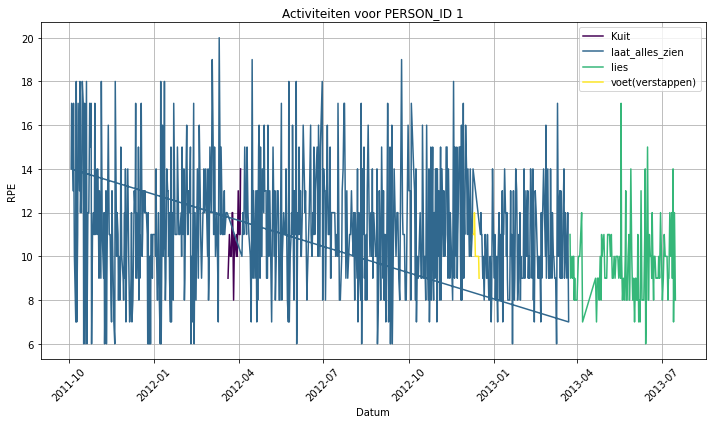

In [73]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(grouped_data))

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for i, (blessure, group) in enumerate(grouped_data):
        rgba_color = to_rgba(cmap(i))
        plt.plot(group['DATES'], group[metric], label=blessure, color=rgba_color)

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('RPE')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'RPE'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)


### Reactie lijn grafiek 4 TQR

De plot visualiseert de veranderingen in 'RPE' (inspanning tijdens het hardlopen) in de loop van de tijd. Langs de x-as zijn de datums geplaatst, terwijl de bijbehorende 'RPE'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1'. De kleur van de lijn geeft de aanwezigheid van blessures aan.

Opmerkelijk is dat er eigenlijk geen duidelijk verschil te zien is tussen de periodes voor, na en tijdens het hardlopen met blessures bij persoon 1. Dit gebrek aan variatie kan mogelijk worden verklaard doordat mensen met een blessure vaak minder lang en met verminderde inspanning lopen. Desondanks blijft dit een relevant punt voor een data-dashboard, aangezien het kan bijdragen aan het begrip van de invloed van blessures op de ervaren inspanning tijdens het hardlopen.

Het valt ook op dat vergelijkbare patronen te zien zijn bij andere personen, waarbij het gebrek aan grote verschillen suggereert dat dit fenomeen niet uniek is voor persoon 1. Deze bevinding kan consistent zijn met het gezegde in de sportwereld dat soms de beste manier om met een blessure om te gaan is door "het eruit te lopen".

## Scatterplot 1 TQR

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/926835938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/926835938.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/926835938.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

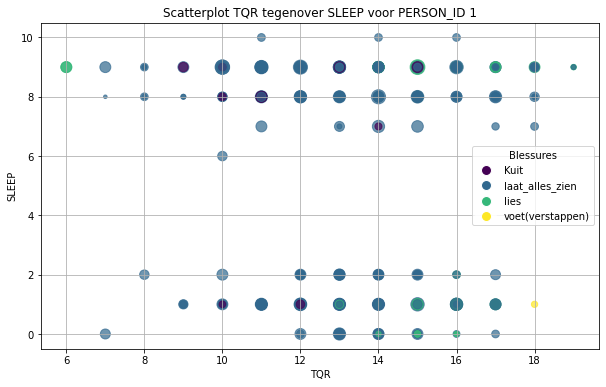

In [74]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Zet 'blessure' om naar een categorische variabele
    selected_person_data['blessure'] = pd.Categorical(selected_person_data['blessure'])
    
    # Creëer een scatterplot met kleur en grootte
    plt.figure(figsize=(10, 6))
    
    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(selected_person_data['blessure'].cat.categories))

    # Creëer de scatterplot
    scatter = plt.scatter(
        selected_person_data['TQR'],  # x-as: SLEEP
        selected_person_data['SLEEP'],    # y-as: TQR
        c=selected_person_data['blessure'].cat.codes,  # gebruik integer-codes van de categorische variabele
        cmap=cmap,  # colormap
        s=selected_person_data['DURATION'],  # grootte op basis van DURATION
        alpha=0.7  # transparantie
    )

    # Voeg kleurenlegenda toe
    legend_labels = selected_person_data['blessure'].cat.categories
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=10) for i in range(len(legend_labels))]
    plt.legend(legend_handles, legend_labels, title='Blessures')

    # Voeg labels en titels toe
    plt.title(f'Scatterplot TQR tegenover SLEEP voor PERSON_ID {person_id}')
    plt.xlabel('TQR')
    plt.ylabel('SLEEP')
    plt.grid(True)

    # Toon de plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID

# Roep de functie aan om de scatterplot te genereren
plot_data_matplotlib(person_id)


### Reactie scatterplot 1 TQR

Deze code genereert een scatterplot die de relatie tussen twee variabelen, 'TQR' (inspanning na het hardlopen) en 'SLEEP', visualiseert voor de geselecteerde persoon ('PERSON_ID'). De grootte van de punten wordt bepaald door de 'DURATION'.

In deze scatterplot is het lastig om een duidelijke relatie tussen slaap, 'TQR', en het ontstaan van blessures te identificeren, zowel voor de geselecteerde persoon als voor andere individuen in de dataset. Bovendien vallen de vele nulwaarden op, wat mogelijk aangeeft dat sommige hardlopers daadwerkelijk 0 uur hebben geslapen voor het hardlopen. Het kan zinvol zijn om deze nulwaarden te filteren, maar dit moet wellicht in overleg met een begeleider gebeuren om ervoor te zorgen dat de interpretatie van de gegevens nauwkeurig is.

## Scatterplot 2 RPE

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4137029030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4137029030.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4137029030.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

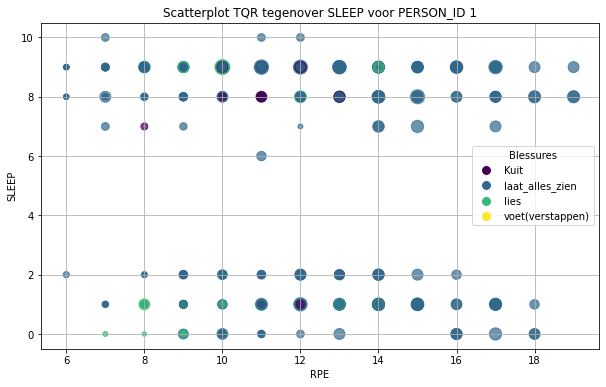

In [75]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Zet 'blessure' om naar een categorische variabele
    selected_person_data['blessure'] = pd.Categorical(selected_person_data['blessure'])
    
    # Creëer een scatterplot met kleur en grootte
    plt.figure(figsize=(10, 6))
    
    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(selected_person_data['blessure'].cat.categories))

    # Creëer de scatterplot
    scatter = plt.scatter(
        selected_person_data['RPE'],  # x-as: SLEEP
        selected_person_data['SLEEP'],    # y-as: TQR
        c=selected_person_data['blessure'].cat.codes,  # gebruik integer-codes van de categorische variabele
        cmap=cmap,  # colormap
        s=selected_person_data['DURATION'],  # grootte op basis van DURATION
        alpha=0.7  # transparantie
    )

    # Voeg kleurenlegenda toe
    legend_labels = selected_person_data['blessure'].cat.categories
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=10) for i in range(len(legend_labels))]
    plt.legend(legend_handles, legend_labels, title='Blessures')

    # Voeg labels en titels toe
    plt.title(f'Scatterplot TQR tegenover SLEEP voor PERSON_ID {person_id}')
    plt.xlabel('RPE')
    plt.ylabel('SLEEP')
    plt.grid(True)

    # Toon de plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID

# Roep de functie aan om de scatterplot te genereren
plot_data_matplotlib(person_id)


### Reactie op scatterplot 2 RPE 
Deze code maakt een scatterplot die de relatie tussen twee variabelen, 'RPE' (inspanning tijdens het hardlopen) en 'SLEEP', toont voor de geselecteerde persoon ('PERSON_ID'). De grootte van de punten wordt bepaald door de 'DURATION'.

In deze scatterplot is het uitdagend om een duidelijke verband tussen slaap, 'RPE', en het optreden van blessures te identificeren, zowel voor de geselecteerde persoon als voor andere individuen in de dataset. Dit lijkt vergelijkbaar met de observatie in de scatterplot van grafiek 1 met 'TQR'.

## Lijn  grafiek 5 workload

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4215159035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4215159035.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/4215159035.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

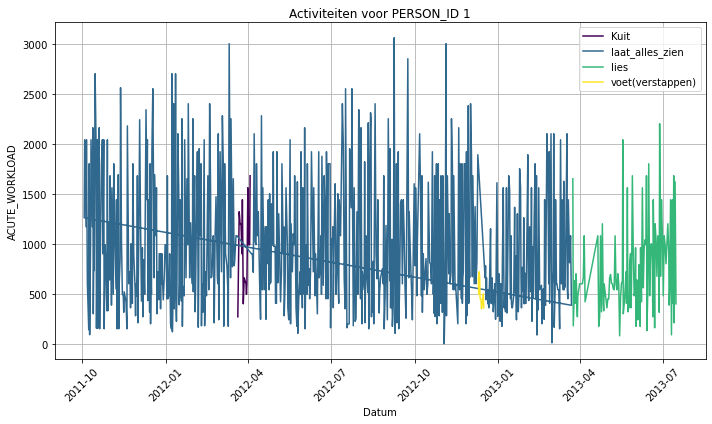

In [76]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(grouped_data))

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for i, (blessure, group) in enumerate(grouped_data):
        rgba_color = to_rgba(cmap(i))
        plt.plot(group['DATES'], group[metric], label=blessure, color=rgba_color)

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('WORKLOAD')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'ACUTE_WORKLOAD'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)


### Reactie op lijn grafiek 5 workload

De plot visualiseert de veranderingen in 'WORKLOAD' (waarde van inspanning tijdens het hardlopen) in de loop van de tijd. Langs de x-as zijn de datums geplaatst, terwijl de overeenkomstige 'WORKLOAD'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1'. De kleur van de lijn geeft de aanwezigheid van blessures aan.

Op specifieke aanwijzingen van de opdrachtgever is in deze grafiek en in vergelijkbare grafieken voor andere personen gekeken naar de acute workload, die wordt berekend door de RPE te vermenigvuldigen met de duur van het hardlopen. Het lijkt erop dat er een subtiel verschil is, waarbij de workload gemiddeld lager is wanneer er sprake is van een blessure tijdens het hardlopen. Dit verschil wordt soms ook waargenomen bij andere personen. Het lager uitvallen van de workload wordt waarschijnlijk veroorzaakt doordat er minder lang wordt hardgelopen vanwege de blessure, wat resulteert in een kortere duur ('duration') en bijgevolg een lagere workload. Dit is een belangrijk aspect om mee te nemen in het data-dashboard, omdat het wijst op de invloed van blessures op de totale inspanning tijdens het hardlopen. 

## Scatter plot 3 Workload

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1822115022.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1822115022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/1822115022.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

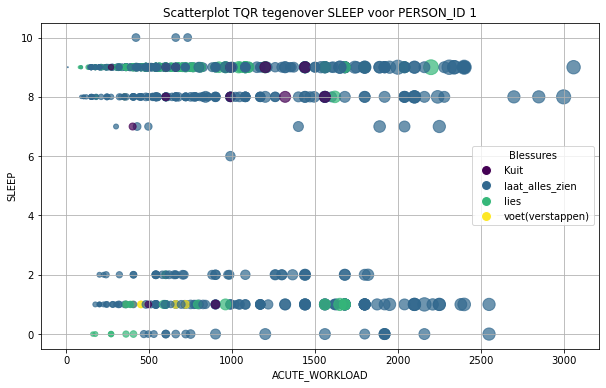

In [77]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Zet 'blessure' om naar een categorische variabele
    selected_person_data['blessure'] = pd.Categorical(selected_person_data['blessure'])
    
    # Creëer een scatterplot met kleur en grootte
    plt.figure(figsize=(10, 6))
    
    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(selected_person_data['blessure'].cat.categories))

    # Creëer de scatterplot
    scatter = plt.scatter(
        selected_person_data['ACUTE_WORKLOAD'],  # x-as: SLEEP
        selected_person_data['SLEEP'],    # y-as: TQR
        c=selected_person_data['blessure'].cat.codes,  # gebruik integer-codes van de categorische variabele
        cmap=cmap,  # colormap
        s=selected_person_data['DURATION'],  # grootte op basis van DURATION
        alpha=0.7  # transparantie
    )

    # Voeg kleurenlegenda toe
    legend_labels = selected_person_data['blessure'].cat.categories
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=10) for i in range(len(legend_labels))]
    plt.legend(legend_handles, legend_labels, title='Blessures')

    # Voeg labels en titels toe
    plt.title(f'Scatterplot TQR tegenover SLEEP voor PERSON_ID {person_id}')
    plt.xlabel('ACUTE_WORKLOAD')
    plt.ylabel('SLEEP')
    plt.grid(True)

    # Toon de plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID

# Roep de functie aan om de scatterplot te genereren
plot_data_matplotlib(person_id)


### Reactie op scatterplot 3 workload

Deze code genereert een scatterplot die de relatie tussen twee variabelen, 'WORKLOAD' (waarde van inspanning tijdens het hardlopen) en 'SLEEP', visualiseert voor de geselecteerde persoon ('PERSON_ID'). De grootte van de punten wordt bepaald door de 'DURATION'.

Vergelijkbaar met de observaties in de TQR-grafiek, merk ik in deze grafiek en ook bij andere personen geen duidelijk verschil op tussen de slaap ('SLEEP') en de 'WORKLOAD'. Ondanks dit gebrek aan duidelijke correlatie, is het echter belangrijk om deze grafiek op te nemen in het data-dashboard. Het kan waardevolle inzichten bieden en eventuele patronen of afwijkingen in de relatie tussen de waarde van inspanning tijdens het hardlopen en de slaap onder de aandacht brengen, zelfs als deze niet direct waarneembaar zijn op het eerste gezicht.

## Scatterplot 4 TQR vs Workload

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3315078431.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3315078431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3315078431.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

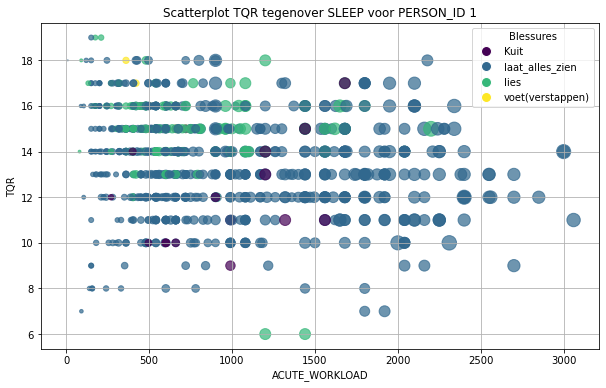

In [78]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Zet 'blessure' om naar een categorische variabele
    selected_person_data['blessure'] = pd.Categorical(selected_person_data['blessure'])
    
    # Creëer een scatterplot met kleur en grootte
    plt.figure(figsize=(10, 6))
    
    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(selected_person_data['blessure'].cat.categories))

    # Creëer de scatterplot
    scatter = plt.scatter(
        selected_person_data['ACUTE_WORKLOAD'],  # x-as: SLEEP
        selected_person_data['TQR'],    # y-as: TQR
        c=selected_person_data['blessure'].cat.codes,  # gebruik integer-codes van de categorische variabele
        cmap=cmap,  # colormap
        s=selected_person_data['DURATION'],  # grootte op basis van DURATION
        alpha=0.7  # transparantie
    )

    # Voeg kleurenlegenda toe
    legend_labels = selected_person_data['blessure'].cat.categories
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=10) for i in range(len(legend_labels))]
    plt.legend(legend_handles, legend_labels, title='Blessures')

    # Voeg labels en titels toe
    plt.title(f'Scatterplot TQR tegenover SLEEP voor PERSON_ID {person_id}')
    plt.xlabel('ACUTE_WORKLOAD')
    plt.ylabel('TQR')
    plt.grid(True)

    # Toon de plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID

# Roep de functie aan om de scatterplot te genereren
plot_data_matplotlib(person_id)


### Reactie Scatterplot 4 TQR vs Workload

Deze code genereert een scatterplot die de relatie tussen twee variabelen, 'WORKLOAD' (waarde van inspanning tijdens het hardlopen) en 'TQR' (inspanning na het hardlopen), visualiseert voor de geselecteerde persoon ('PERSON_ID'). De grootte van de punten wordt bepaald door de 'DURATION'.

Bij deze scatterplot en ook bij vergelijkbare grafieken voor andere personen valt soms wel een relatie op tussen de 'WORKLOAD', 'TQR', en blessures. Bijna alle blessures lijken een inspanning na het hardlopen van minimaal 12 te hebben bij dit persoon, wat mogelijk een belangrijk onderscheid kan zijn. Dit patroon moet worden opgenomen in het data-dashboard, omdat het wijst op de potentiële invloed van de inspanning tijdens het hardlopen op de ervaren inspanning na het hardlopen en de ontwikkeling van blessures. 

## Lijn grafiek 6 sleep

/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3095463528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3095463528.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')
/var/folders/c1/y51sjyyj2flbt1rrh581v85r0000gn/T/ipykernel_3214/3095463528.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 

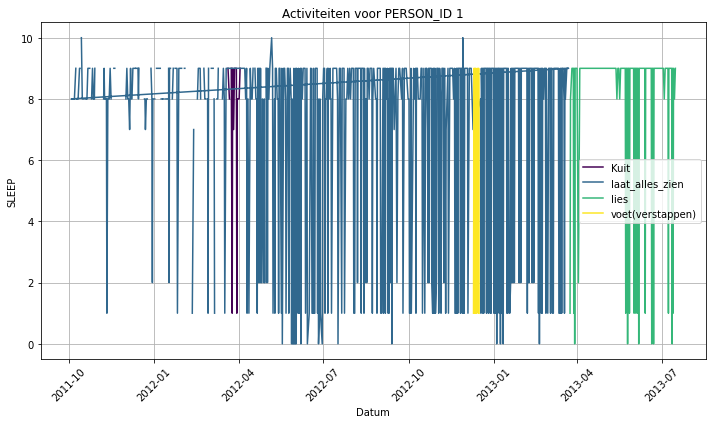

In [80]:
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import to_rgba
# Lees de CSV-file in
df_filtered = pd.read_csv('hardloop.tsv', delimiter='\t')

# Filter de rijen waarin 'TQR' gelijk is aan 0 of niet ingevuld
df = df_filtered[df_filtered['TQR'].notna() & (df_filtered['TQR'] != 0)]

# Voeg een nieuwe kolom 'HOUR' toe aan het DataFrame op basis van de 'MOMENT' kolom
df['HOUR'] = np.where(df['MOMENT'] == 'A', 0, 12)

# Zet de 'DATES' kolom om naar datetime
df['DATES'] = pd.to_datetime(df['DATES'], format='%d-%b-%y')

# Voeg de 'HOUR' kolom toe aan de 'DATES' kolom
df['DATES'] = df['DATES'] + pd.to_timedelta(df['HOUR'], unit='h')

# Verwijder de 'HOUR' kolom omdat deze niet langer nodig is
df = df.drop('HOUR', axis=1)

# Laat alleen de gewenste kolommen zien
df = df[["DATES","MOMENT", "TQR", "RPE", "DURATION", "SLEEP", "PERSON_ID", "ID", "TQR_OF_RPE"]]

# Voeg een nieuwe kolom 'COLOR' toe aan het DataFrame op basis van de datumperiodes
df['blessure'] = 'laat_alles_zien'  # Standaardkleur

df['ACUTE_WORKLOAD'] = df['DURATION'] * df['RPE']
# Load injury information from TSV file
injury_info_df = pd.read_csv("blessures.tsv", sep='\t')

# Convert date columns to datetime format
injury_info_df['DATE_START'] = pd.to_datetime(injury_info_df['DATE_START'], format='%d-%b-%y')
injury_info_df['DATE_END'] = pd.to_datetime(injury_info_df['DATE_END'], format='%d-%b-%y')

person_ids_options = ["Alle ID's"] + df['PERSON_ID'].unique().tolist()
# Iterate over rows and update the existing DataFrame
for index, row in injury_info_df.iterrows():
    start_date = row['DATE_START']
    end_date = row['DATE_END']
    condition = (df['PERSON_ID'] == row['PERSON_ID']) & (df['DATES'] >= start_date) & (df['DATES'] <= end_date)
    df.loc[condition, 'blessure'] = row['DIAGNOSE']

def plot_data_matplotlib(person_id, metric, cmap_name='viridis'):
    # Maak een kopie van het DataFrame om de originele gegevens ongewijzigd te houden
    selected_person_data = df.copy()[df['PERSON_ID'] == person_id]

    # Groepeer de gegevens op basis van de 'blessure' kolom
    grouped_data = selected_person_data.groupby('blessure')

    # Krijg een kleurenmapping op basis van het aantal unieke blessures
    cmap = get_cmap(cmap_name, len(grouped_data))

    # Maak een Matplotlib-plot
    plt.figure(figsize=(10, 6))

    for i, (blessure, group) in enumerate(grouped_data):
        rgba_color = to_rgba(cmap(i))
        plt.plot(group['DATES'], group[metric], label=blessure, color=rgba_color)

    plt.title(f'Activiteiten voor PERSON_ID {person_id}')
    plt.xlabel('Datum')
    plt.ylabel('SLEEP')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Toon de Matplotlib-plot
    plt.show()

# Voorbeeldgebruik
person_id = 1  # Vervang dit met de gewenste persoon ID
metric = 'SLEEP'  # Vervang dit met de gewenste metriek (bijv. 'RPE', 'TQR_OF_RPE', enz.)

# Roep de functie aan om de grafiek te genereren
plot_data_matplotlib(person_id, metric)


### Reactie lijngrafiek 6 sleep

De grafiek visualiseert de veranderingen in 'SLEEP' (slaapduur) in de loop van de tijd. Langs de x-as zijn de datums geplaatst, terwijl de bijbehorende 'SLEEP'-waarden langs de y-as worden weergegeven voor de geselecteerde 'person_iD 1'. De kleur van de lijn geeft de aanwezigheid van blessures aan.

De bruikbaarheid van deze grafiek wordt echter beïnvloed door het feit dat de 'SLEEP'-waarden onhandig zijn ingevuld, met veel nullen als gevolg. Deze nullen ontstaan doordat mensen soms een middagdutje hebben gedaan en andere keren niet. Het overschakelen tussen slapen en niet-slapen introduceert ruis en maakt de grafiek onleesbaar. Het kan nuttig zijn om met de begeleider te overleggen over het instellen van een sleep limiet op het dashboard om de visualisatie te verbeteren en beter inzicht te krijgen in de slaappatronen zonder verstorende nulwaarden.

## Conclusie

De Exploratory Data Analysis (EDA) heeft cruciale inzichten opgeleverd voor mijn aanstaande dashboardproject. Door waardevolle grafieken te identificeren, ben ik nu goed geïnformeerd over de belangrijkste variabelen en patronen in mijn dataset. De detectie van outliers stelt me in staat om een zuiverder beeld te krijgen en een betrouwbaarder dashboard te creëren. Met de richtlijnen van mijn begeleider over het structureren van het dataframe, ben ik goed voorbereid om met vertrouwen aan de ontwikkeling van het dashboard te beginnen.